## Load Libraries

In [1]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
import matplotlib.style as style
style.use('fivethirtyeight')

## Data Wrangling

In [2]:
engage = pd.read_csv('takehome_user_engagement.csv')

In [3]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
engage.shape

(207917, 3)

In [5]:
engage.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [6]:
missing = pd.concat([engage.isnull().sum(), 100 * engage.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'])
missing.head(5)

,count,%
time_stamp,0,0.0
user_id,0,0.0
visited,0,0.0


In [7]:
engage['time_stamp'] = pd.to_datetime(engage['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [8]:
engage.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

## Defining The Adopted User
An adopter is person who has used the product on three separate days in at least one week

In [9]:
def days_logged_in(engage, days=7, logins=3):
    engage['date'] = engage['time_stamp'].dt.date
    engage = engage.drop_duplicates(subset='date').sort_values(by='date')
    days_passed = engage['date'].diff(periods=logins-1)
    return any(days_passed <= timedelta(days=days))

In [10]:
%%time
engage = engage.groupby('user_id').apply(days_logged_in)

CPU times: user 9.58 s, sys: 51.2 ms, total: 9.63 s
Wall time: 9.64 s


In [11]:
type(engage)

pandas.core.series.Series

In [12]:
adopters = sum(engage)
total_users = len(engage)
pct = round(adopters/total_users * 100, 2)

In [13]:
total_users

8823

In [14]:
'{pct} percent of {total_users} users are adopters'.format(pct=pct, total_users=total_users)

'18.77 percent of 8823 users are adopters'

## Load User Data

In [15]:
user = pd.read_csv('takehome_users.csv', engine='python')

In [16]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [17]:
'Dataset has {} rows and {} columns'.format(user.shape[0], user.shape[1])

'Dataset has 12000 rows and 10 columns'

In [18]:
user.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [19]:
user.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

## Change creation times to datetime format

In [20]:
user['creation_time'] = pd.to_datetime(user['creation_time'], format='%Y-%m-%d %H:%M:%S')

In [21]:
user['last_session_creation_time'] = pd.to_datetime(user['last_session_creation_time'], unit='s')

In [22]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [23]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [24]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [25]:
user.shape

(12000, 10)

## Join Adopters DataFrame with Users 
To know how adopted the product, we need to join transformed adopters table with users table.

In [26]:
data = pd.concat([user, engage], join='inner', axis=1)

In [27]:
data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,False


In [28]:
data.isna().any()

object_id                     False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time     True
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id             True
0                             False
dtype: bool

data.shape

## Feature Engineering
Account history column can be created to measure how long a client has been using the product since their first sign on. This will be done taking the difference between 'creation_time' and 'last_session_creation_time' columns. 

In [29]:
data['acct_hist'] = data['last_session_creation_time'] - data['creation_time']
data['acct_hist'] = data['acct_hist'].dt.days

In [30]:
data = data.drop(['last_session_creation_time', 'creation_time'], axis=1)

In [31]:
null_values = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
null_values.columns=['count', '%']
null_values.sort_values(by=['count', '%'])
null_values.head(11)

,count,%
object_id,0,0.000000
name,0,0.000000
email,0,0.000000
creation_source,0,0.000000
opted_in_to_mailing_list,0,0.000000
enabled_for_marketing_drip,0,0.000000
org_id,0,0.000000
invited_by_user_id,4108,46.565405
0,0,0.000000
acct_hist,2349,26.626615


Customers that do not have any values in 'acct_hist' column will be assigned the value of zero because they created an account but did not have a timestamp for their last login. The same action will be done for the invited_by_user_id column where information was not provided. The value of zero added will serve as a temporary proxy for users whose inviters are unknown.

In [32]:
data['acct_hist'] = data['acct_hist'].fillna(0)
data['invited_by_user_id'] = data['invited_by_user_id'].fillna(0)

In [33]:
data.isna().any()

object_id                     False
name                          False
email                         False
creation_source               False
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id            False
0                             False
acct_hist                     False
dtype: bool

In [34]:
data.rename({0: 'adopter'}, inplace=True, axis=1)

In [35]:
data.columns

Index(['object_id', 'name', 'email', 'creation_source',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'adopter', 'acct_hist'],
      dtype='object')

In [36]:
data.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopter,acct_hist
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,False,136.0
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,True,0.0
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,False,1.0
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,False,5.0
5,6,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,0,0,197,11241.0,False,2.0


In [37]:
data['adopter'] = data['adopter'].apply(lambda x: str(x))

In [38]:
data.dtypes

object_id                       int64
name                           object
email                          object
creation_source                object
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopter                        object
acct_hist                     float64
dtype: object

## Exploratory Data Analysis

In [39]:
data['adopter'].value_counts()

False    7166
True     1656
Name: adopter, dtype: int64

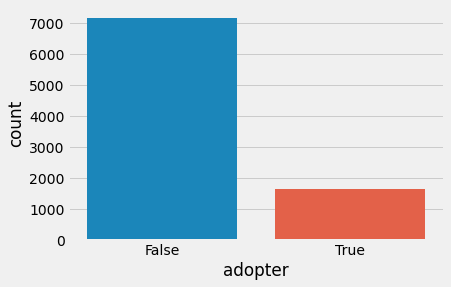

In [40]:
sns.countplot(x='adopter', data=data)
plt.show()

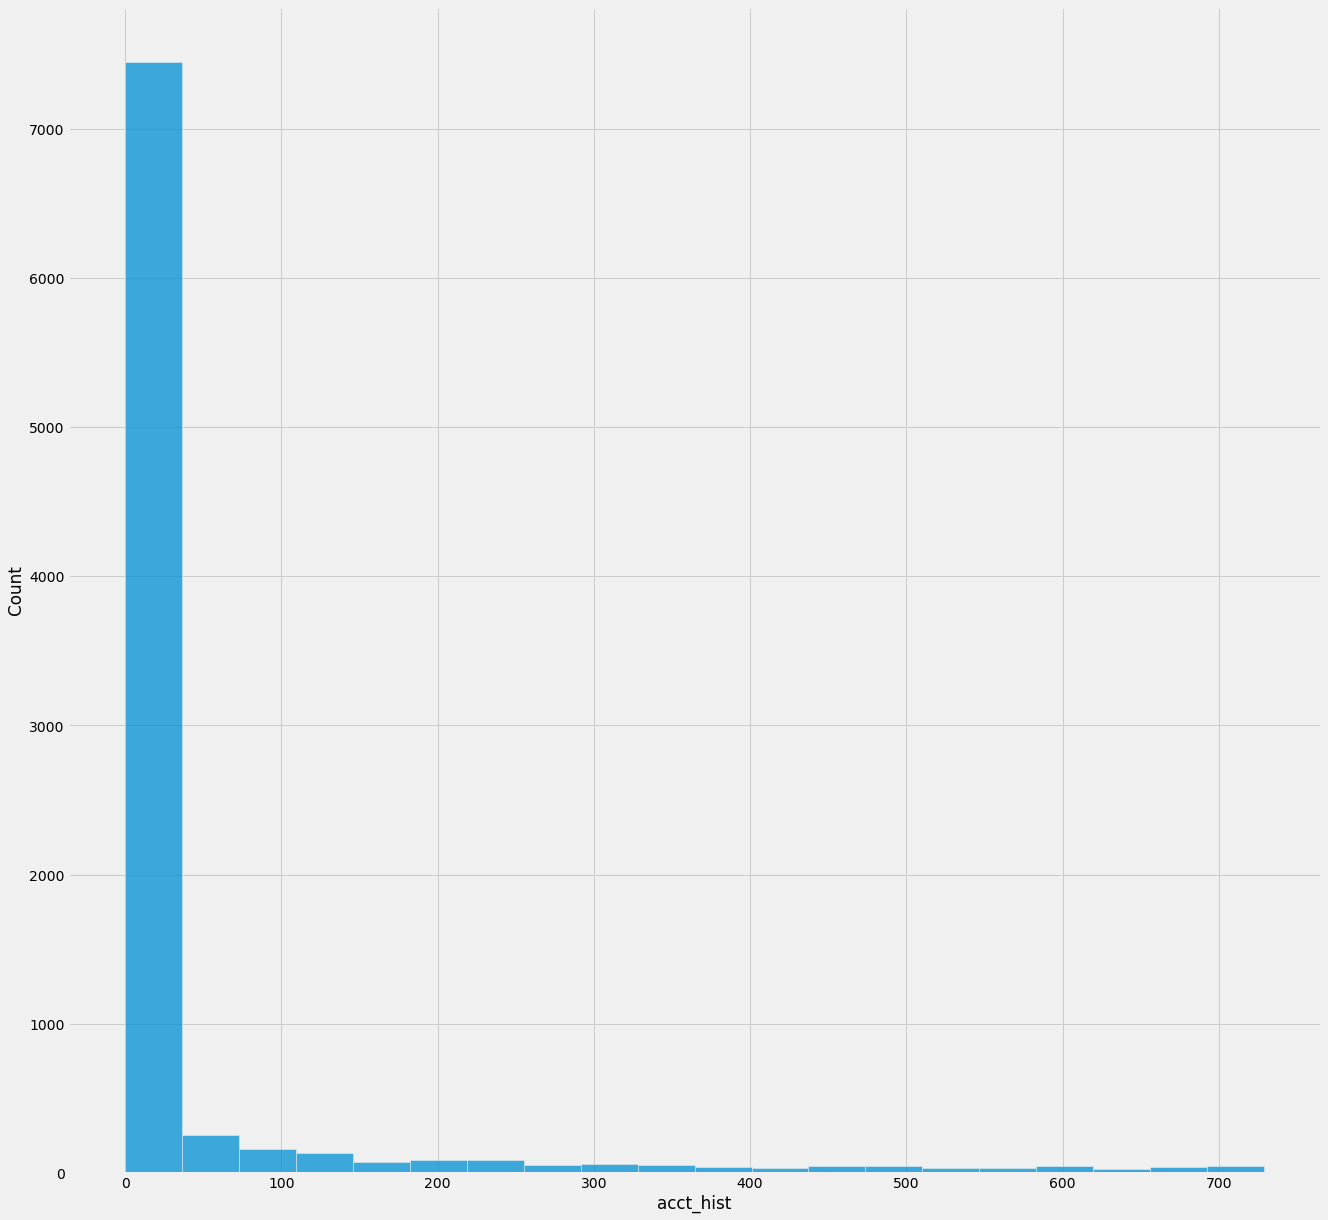

In [41]:
plt.figure(figsize=(20, 20))
sns.histplot(x='acct_hist', bins=20, data=data)
plt.show()

In [42]:
data['enabled_for_marketing_drip'].value_counts()

0    7522
1    1300
Name: enabled_for_marketing_drip, dtype: int64

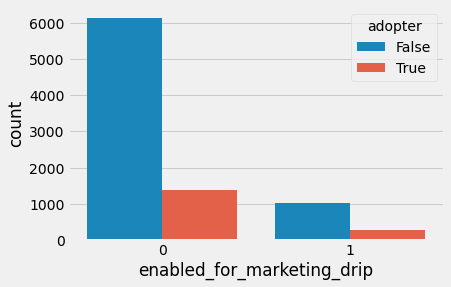

In [43]:
sns.countplot(x='enabled_for_marketing_drip', hue='adopter', data=data)
plt.show()

In [44]:
data['opted_in_to_mailing_list'].value_counts()

0    6632
1    2190
Name: opted_in_to_mailing_list, dtype: int64

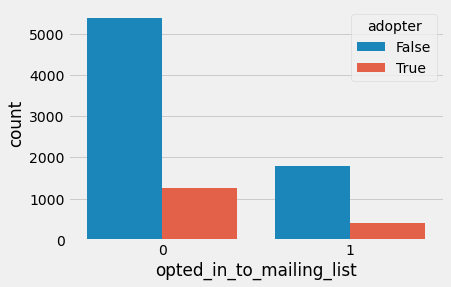

In [45]:
sns.countplot(x='opted_in_to_mailing_list', hue='adopter', data=data)
plt.show()

<Figure size 1440x1440 with 0 Axes>

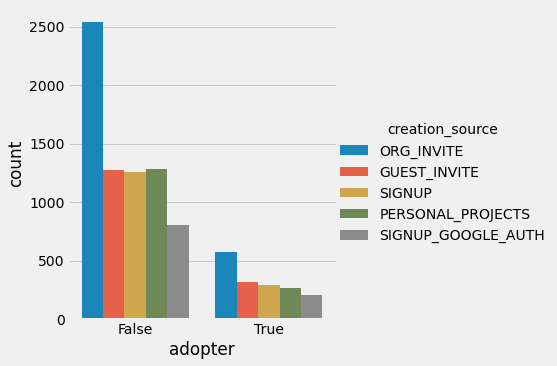

In [46]:
plt.figure(figsize=(20, 20))
sns.catplot('adopter', hue='creation_source', data=data, kind='count')
plt.show()

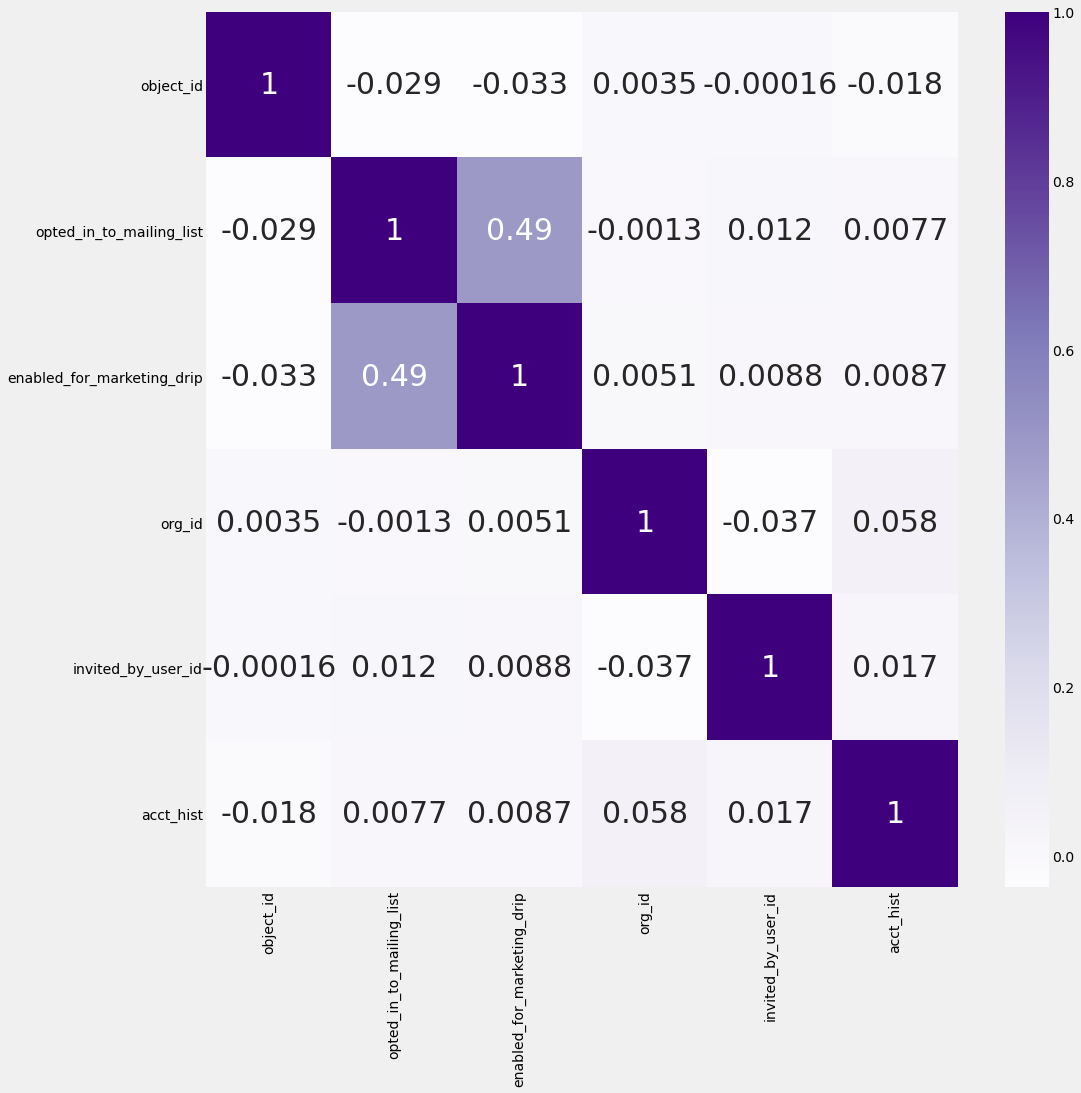

In [47]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, annot_kws=({'size':30}), cmap='Purples')
plt.show()

In [48]:
ao = data.groupby(['adopter', 'opted_in_to_mailing_list']).name.count().reset_index()
ao

,adopter,opted_in_to_mailing_list,name
0,False,0,5383
1,False,1,1783
2,True,0,1249
3,True,1,407


In [49]:
ao_pivot = ao.pivot(columns='adopter',
                             index='opted_in_to_mailing_list',
                            values='name').reset_index()

In [50]:
ao_pivot['Total'] = ao_pivot['True'] + ao_pivot['False']
ao_pivot['percent_adopter'] = ao_pivot['True']/(ao_pivot['True'] + ao_pivot['False'])
ao_pivot

adopter,opted_in_to_mailing_list,False,True,Total,percent_adopter
0,0,5383,1249,6632,0.188329
1,1,1783,407,2190,0.185845


In [51]:
from scipy.stats import chi2_contingency as chi2

In [52]:
contingency_table = [[5383, 1249], [1783, 407]]

In [53]:
chi_test, p1, dof, ex = chi2(contingency_table)

In [54]:
p1

0.8207236902877506

Whether a client opted in for the mailing list was not significant predictor of adopting the service

In [55]:
adopt_marketing = data.groupby(['adopter', 'enabled_for_marketing_drip']).name.count().reset_index()
adopt_marketing

,adopter,enabled_for_marketing_drip,name
0,False,0,6133
1,False,1,1033
2,True,0,1389
3,True,1,267


In [56]:
adopt_marketing_pivot = adopt_marketing.pivot(columns='adopter',
                             index='enabled_for_marketing_drip',
                            values='name').reset_index()

In [57]:
adopt_marketing_pivot['Total'] = adopt_marketing_pivot['True'] + adopt_marketing_pivot['False']
adopt_marketing_pivot['percent_adopter'] = adopt_marketing_pivot['True']/(adopt_marketing_pivot['True'] + adopt_marketing_pivot['False'])
adopt_marketing_pivot

adopter,enabled_for_marketing_drip,False,True,Total,percent_adopter
0,0,6133,1389,7522,0.184658
1,1,1033,267,1300,0.205385


In [58]:
contingency_table2 = [[6133, 1389], [1033, 267]]

In [59]:
chi_test2, p2, dof, ex = chi2(contingency_table2)

In [60]:
p2

0.08386375699958949

whether a client was a part of email marketing drip was not a significant predictor of adopting the service

In [62]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import norm
from numpy.random import seed

In [63]:
seed(123)
sample_means = []
for i in range(10000):
    sample = np.random.choice(data['acct_hist'], len(data['acct_hist']))
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)    
sample_std = np.std(sample_means)
sample_std
avg_sample_mean = np.mean(sample_means)
avg_sample_mean
sample_std

1.3388632314468285

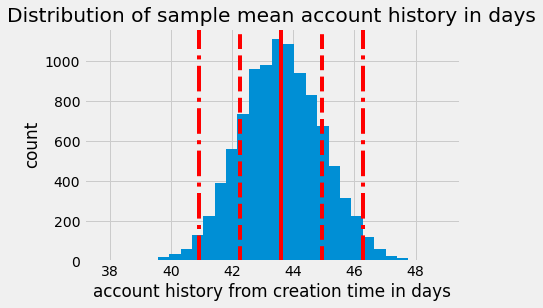

In [64]:
#plotting histogram of samples drawn to visualise data. As shown in the histogram below, Average charges have not fallen below 12,000. 
_ = plt.hist(sample_means, bins=30)
_ = plt.xlabel('account history from creation time in days')
_ = plt.ylabel('count')
_ = plt.title('Distribution of sample mean account history in days')
_ = plt.axvline(avg_sample_mean, color='r')
_ = plt.axvline(avg_sample_mean+sample_std, color='r', linestyle='--')
_ = plt.axvline(avg_sample_mean-sample_std, color='r', linestyle='--')
_ = plt.axvline(avg_sample_mean+(sample_std*2), color='r', linestyle='-.')
_ = plt.axvline(avg_sample_mean-(sample_std*2), color='r', linestyle='-.')

Average account history did not have a significant effect on whether a customer adopted the product.

In [83]:
yes_adopt = data.loc[data['adopter'] == 'True', 'acct_hist']
no_adopt = data.loc[data['adopter'] == 'False', 'acct_hist']

In [65]:
x = ttest_ind(yes_adopt, no_adopt)
x

Ttest_indResult(statistic=-0.1901504464773535, pvalue=0.8491956165535656)

## Modeling And Preprocessing

In [66]:
data.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopter,acct_hist
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,False,136.0
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,True,0.0
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,False,1.0
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,False,5.0
5,6,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,0,0,197,11241.0,False,2.0


In [67]:
data['creation_source'].unique()

array(['ORG_INVITE', 'GUEST_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [68]:
data[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']] = data[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']].astype('category')

In [69]:
data['invited_by_user_id'] = data['invited_by_user_id'].astype('int64')

In [70]:
data['adopter'] = data['adopter'].apply(lambda x: 1 if x=='True' else 0)

In [71]:
data.dtypes

object_id                        int64
name                            object
email                           object
creation_source               category
opted_in_to_mailing_list      category
enabled_for_marketing_drip    category
org_id                           int64
invited_by_user_id               int64
adopter                          int64
acct_hist                      float64
dtype: object

In [72]:
df = data.drop(['object_id', 'name', 'email'], axis=1)

In [73]:
df = pd.get_dummies(df)

In [74]:
df.head()

,org_id,invited_by_user_id,adopter,acct_hist,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1
1,1,316,0,136.0,0,1,0,0,0,1,0,1,0
2,94,1525,1,0.0,0,1,0,0,0,1,0,1,0
3,1,5151,0,1.0,1,0,0,0,0,1,0,1,0
4,193,5240,0,5.0,1,0,0,0,0,1,0,1,0
5,197,11241,0,2.0,1,0,0,0,0,1,0,1,0


## Random Forest Model & Feature Importance plot

In [75]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [76]:
features = [i for i in df.columns if i != 'adopter']
features

['org_id',
 'invited_by_user_id',
 'acct_hist',
 'creation_source_GUEST_INVITE',
 'creation_source_ORG_INVITE',
 'creation_source_PERSONAL_PROJECTS',
 'creation_source_SIGNUP',
 'creation_source_SIGNUP_GOOGLE_AUTH',
 'opted_in_to_mailing_list_0',
 'opted_in_to_mailing_list_1',
 'enabled_for_marketing_drip_0',
 'enabled_for_marketing_drip_1']

In [77]:
X = df[features]
y = df['adopter']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=999, stratify=y)

In [80]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

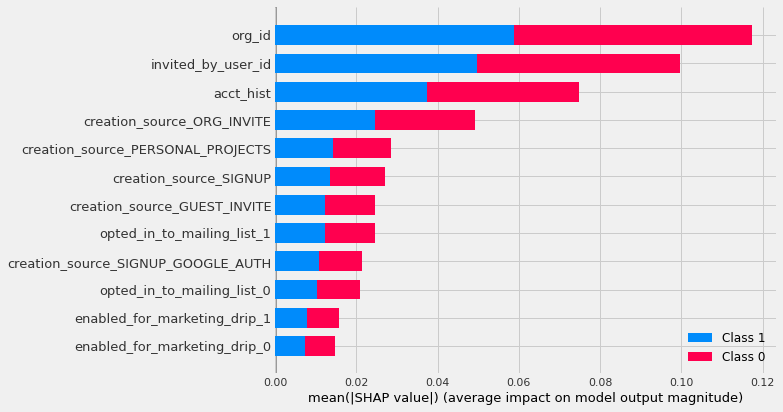

In [82]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

## Conclusion

org_id, invited_by_user_id and acc_hist were the three most important features in predicting whether the product was adopted